In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X_gen, y_gen = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=2)

In [5]:
X = torch.from_numpy(X_gen.astype(np.float32))
y = torch.from_numpy(y_gen.astype(np.float32))

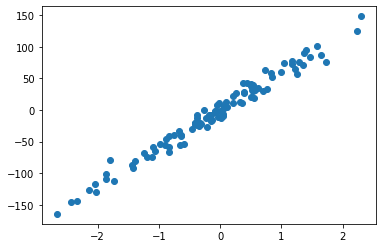

In [6]:
plt.scatter(X,y)

In [19]:
from  sklearn.linear_model import BayesianRidge
bays = BayesianRidge()
bays.fit(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [20]:
bays.coef_

array([59.46765734])

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lr.coef_

array([59.481438], dtype=float32)

In [23]:
y

tensor([-4.6354e+01,  7.1543e+01,  8.7662e+01,  3.8984e+01,  5.8920e+01,
        -5.4420e+01,  7.7974e+00, -1.5269e+01, -1.4519e+02, -1.9877e+01,
         2.7106e+01,  8.9842e+01, -3.8844e+01, -1.2973e+01,  5.1587e+01,
        -7.7176e-01,  4.3025e+01, -2.6197e+01,  8.3407e+01,  4.4929e+00,
         7.6010e+01, -2.0093e+01, -5.7805e+01, -5.7877e+01,  3.1615e+01,
        -6.4642e+01,  3.0859e+01,  3.0379e+01,  3.8811e+01, -8.6218e+01,
        -8.4037e+00, -1.4503e+00, -7.9389e+01,  1.2560e+02, -6.6897e+00,
         7.8098e+01, -7.9938e+01,  1.1297e+01, -3.3335e+00,  7.6539e+01,
        -1.2655e+02, -1.1817e+01, -1.0143e+02,  1.3380e+01, -6.8527e-01,
        -2.3991e+01,  7.4705e+01, -2.5761e+01, -3.3145e+01,  6.5615e+01,
        -6.7610e+01, -4.0769e+01, -2.2575e+01,  2.9195e+01, -1.0963e+02,
         1.0110e+02,  3.5369e+01,  6.1021e+01, -5.5526e+01, -1.1318e+01,
         1.0724e+01, -9.2375e+01,  1.1932e+01, -5.4410e+01,  1.0056e+00,
        -7.8236e+00,  6.3764e+01, -3.9597e+01, -1.6

In [24]:
y = y.view(-1, 1)

In [25]:
y

tensor([[-4.6354e+01],
        [ 7.1543e+01],
        [ 8.7662e+01],
        [ 3.8984e+01],
        [ 5.8920e+01],
        [-5.4420e+01],
        [ 7.7974e+00],
        [-1.5269e+01],
        [-1.4519e+02],
        [-1.9877e+01],
        [ 2.7106e+01],
        [ 8.9842e+01],
        [-3.8844e+01],
        [-1.2973e+01],
        [ 5.1587e+01],
        [-7.7176e-01],
        [ 4.3025e+01],
        [-2.6197e+01],
        [ 8.3407e+01],
        [ 4.4929e+00],
        [ 7.6010e+01],
        [-2.0093e+01],
        [-5.7805e+01],
        [-5.7877e+01],
        [ 3.1615e+01],
        [-6.4642e+01],
        [ 3.0859e+01],
        [ 3.0379e+01],
        [ 3.8811e+01],
        [-8.6218e+01],
        [-8.4037e+00],
        [-1.4503e+00],
        [-7.9389e+01],
        [ 1.2560e+02],
        [-6.6897e+00],
        [ 7.8098e+01],
        [-7.9938e+01],
        [ 1.1297e+01],
        [-3.3335e+00],
        [ 7.6539e+01],
        [-1.2655e+02],
        [-1.1817e+01],
        [-1.0143e+02],
        [ 1

In [46]:
model = nn.Linear(1,1)

In [47]:
# loss function - Mean square error - 
criterion = nn.MSELoss()

# 最適化アルゴリズム
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

In [48]:
# 学習回数
epoch = 300
loss_list = []

for epoch in range(epoch):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # テンソルをnumpyとかで扱うときは，.itemで変換する
    loss_list.append(loss.item())
    if (epoch+1) % 50 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

Epoch: 50, Loss: 138.1376
Epoch: 100, Loss: 88.0501
Epoch: 150, Loss: 87.2903
Epoch: 200, Loss: 87.2764
Epoch: 250, Loss: 87.2761
Epoch: 300, Loss: 87.2761


In [49]:
loss_list

[3862.32177734375,
 3538.3232421875,
 3242.348388671875,
 2971.955078125,
 2724.918212890625,
 2499.2060546875,
 2292.965087890625,
 2104.5029296875,
 1932.2757568359375,
 1774.87548828125,
 1631.0157470703125,
 1499.5233154296875,
 1379.3265380859375,
 1269.448486328125,
 1168.99560546875,
 1077.1534423828125,
 993.1781005859375,
 916.3903198242188,
 846.1699829101562,
 781.9509887695312,
 723.2157592773438,
 669.49267578125,
 620.3502807617188,
 575.39453125,
 534.2659301757812,
 496.6357116699219,
 462.2037048339844,
 430.6958923339844,
 401.8616943359375,
 375.4721984863281,
 351.31805419921875,
 329.2085266113281,
 308.96875,
 290.439208984375,
 273.4739990234375,
 257.93994140625,
 243.71511840820312,
 230.68817138671875,
 218.75717163085938,
 207.8289794921875,
 197.81866455078125,
 188.64830017089844,
 180.2466583251953,
 172.54881286621094,
 165.4950408935547,
 159.031005859375,
 153.10690307617188,
 147.6771240234375,
 142.70004272460938,
 138.13760375976562,
 133.95474243164

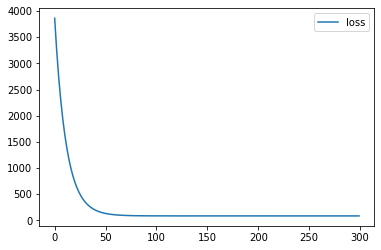

In [51]:
plt.plot(np.arange(len(loss_list)), loss_list, label='loss')
plt.legend();

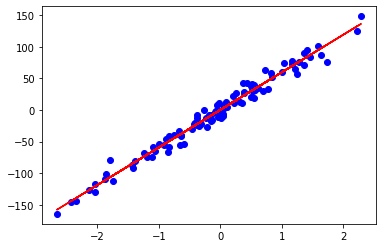

In [53]:
# 勾配計算が走らないようにする
with torch.no_grad():
    # numpyの形に変換する
    predicted_y = model(X).detach().numpy()
    plt.plot(X_gen, y_gen, 'bo')
    plt.plot(X_gen, predicted_y, 'r')

In [67]:
print(f'傾き：{model.weight} \n切片：{model.bias}')

傾き：Parameter containing:
tensor([[59.4812]], requires_grad=True) 
切片：Parameter containing:
tensor([0.2664], requires_grad=True)
